In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('scores_data.csv')

# Fix column spacing issue
df.columns = df.columns.str.strip()

df.head()


,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


In [2]:
# Convert "6 / 7" → 6
df['Score'] = df['Score'].str.split('/').str[0].astype(int)

df.head()


,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6
1,AI_ELITE_7,uid_148,6
2,AI_ELITE_7,uid_147,7
3,AI_ELITE_7,uid_146,7
4,AI_ELITE_7,uid_145,4


In [3]:
df.describe()


,Score
count,149.000000
mean,4.382550
std,1.592199
min,0.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,7.000000


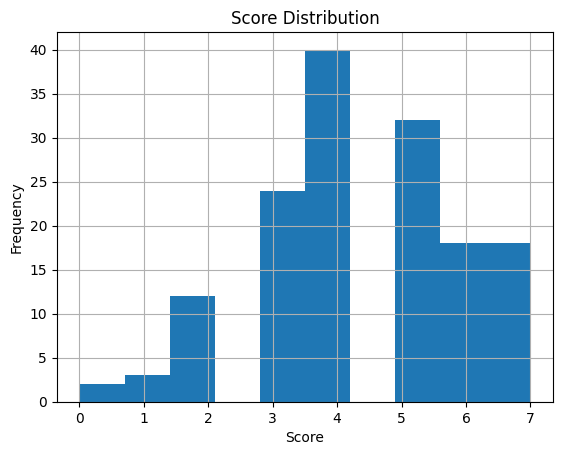

In [4]:
plt.figure()
df['Score'].hist()
plt.title('Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()


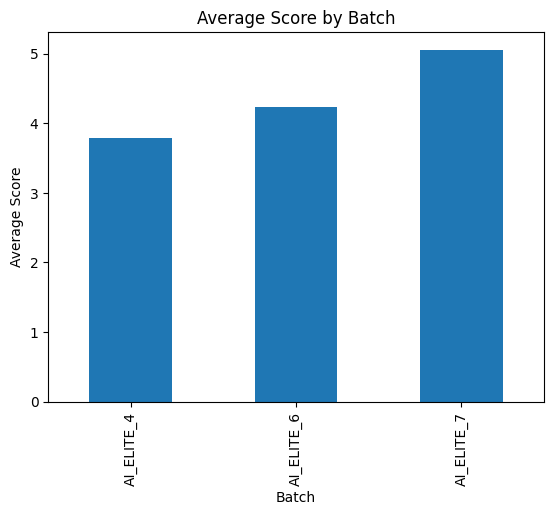

In [5]:
df.groupby('Batch')['Score'].mean().plot(kind='bar')
plt.title('Average Score by Batch')
plt.xlabel('Batch')
plt.ylabel('Average Score')
plt.show()


<Figure size 640x480 with 0 Axes>

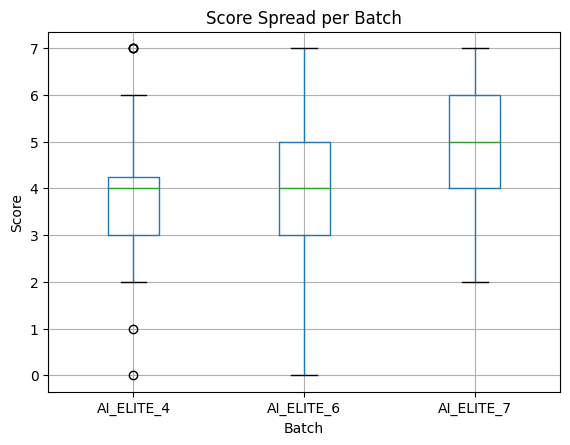

In [6]:
plt.figure()
df.boxplot(column='Score', by='Batch')
plt.title('Score Spread per Batch')
plt.suptitle('')
plt.xlabel('Batch')
plt.ylabel('Score')
plt.show()


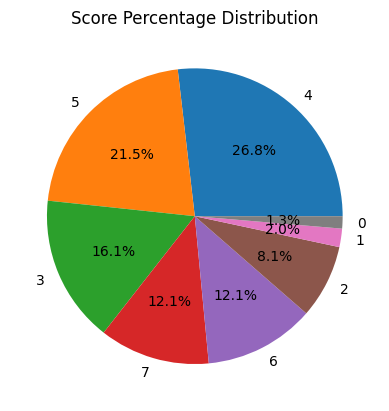

In [7]:
score_counts = df['Score'].value_counts()

plt.figure()
score_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Score Percentage Distribution')
plt.ylabel('')
plt.show()


In [8]:
batch_summary = df.groupby('Batch')['Score'].agg(['count', 'mean', 'min', 'max'])
batch_summary


,count,mean,min,max
Batch,,,,
AI_ELITE_4,48,3.791667,0,7
AI_ELITE_6,48,4.229167,0,7
AI_ELITE_7,53,5.056604,2,7


In [9]:
print("Total Students:", len(df))
print("Overall Average Score:", df['Score'].mean())
print("Highest Score:", df['Score'].max())
print("Lowest Score:", df['Score'].min())


Total Students: 149
Overall Average Score: 4.382550335570469
Highest Score: 7
Lowest Score: 0
